In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
import pandas as pd
from matplotlib.animation import FuncAnimation
from ipynb.fs.defs.distance import away_or_home #import function from distance notebook

In [7]:
game_id = "0042100301"
# I generated this file in distance.ipynb
e_t_df= pd.read_csv(f"./games/{game_id}/{game_id}_e_t.csv", index_col=0) # events and tracking csv
shots = e_t_df.loc[e_t_df['eventType'] == "SHOT"]

MovieWriter ffmpeg unavailable; using Pillow instead.


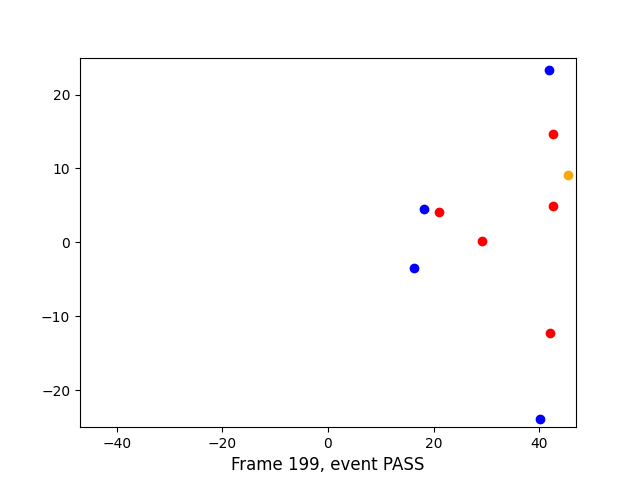

In [16]:
# I lowkey don't really know how matplotlib works so I just made three scatterplots and it somehow worked ??

START_FRAME = 160  # use this to select which frame to start at

fig = plt.figure()
ax = plt.axes(xlim=(-47, 47), ylim=(-25, 25)) # 2nd spectrum coord system has these limits, source: WISD instructions

home_scat = ax.scatter([], [])
away_scat = ax.scatter([], [])
ball_scat = ax.scatter([], [])

home_scat.set_color('red')
away_scat.set_color('blue')
ball_scat.set_color('orange')

def plot_players(i):
    i += START_FRAME 
    row = e_t_df.iloc[i]
    home_coords = [x['xyz'] for x in eval(row['homePlayers_tracking'])]
    home_coords = np.array(home_coords)
    home_scat.set_offsets(home_coords)
    away_coords = np.array([x['xyz'] for x in eval(row['awayPlayers_tracking'])])
    away_scat.set_offsets(away_coords)
    ball_coords = eval(row['ball'])
    ball_scat.set_offsets([ball_coords])
    
    ax.set_xlabel(f'Frame {i}, event {row["eventType"]}', fontsize=12)
    return home_scat,away_scat,ball_scat


ani = FuncAnimation(fig, plot_players, frames=40, repeat=False)
ani.save('myanimation.gif')